<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM-flattened.png" width="300" style="float:left"/>

Process of data scraping out of a website into a CSV file using Python language.

## Step 1: Loading Python Dependencies

Python libraries for scraping and data analyze process

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

%matplotlib inline

## Step 2: Connecting To Website
Checking website status

In [2]:
url = 'https://poizdato.net/rozklad-poizdiv/lviv--kyiv/'
cwd = '/users/lapovets.oleh/downloads/railway/'
counter = 1

def create_connection(url):
    global r
    r = requests.get(url)
    if r.ok: return f'status_code: {r.status_code} [connected]\nsuccess!'
    else: return f'status_code: {r.status_code} [no connection]\nfailed..'

print(create_connection(url))

status_code: 200 [connected]
success!


## Step 3: Getting List Of Links To Each Of The Train Routes
Scraping links

In [3]:
soup = BeautifulSoup(r.text, 'lxml')
list_of_routes = []

routes_table = soup.find('tbody')

for td in routes_table:
    link = td.find('a')
    if isinstance(link, int) == False:
        list_of_routes.append(link['href'])
    
list_of_routes

['/rozklad-poizda/96--rakhiv--kyiv-pas/',
 '/rozklad-poizda/6--rakhiv--kyiv-pas/',
 '/rozklad-poizda/43--ivano-frankivsk--chernihiv/',
 '/rozklad-poizda/43--ivano-frankivsk--kyiv-pas/',
 '/rozklad-poizda/235--uzhhorod--kyiv-pas/',
 '/rozklad-poizda/8--chernivtsi--kyiv-pas/',
 '/rozklad-poizda/13--solotvyno-1--kyiv-pas/',
 '/rozklad-poizda/45--uzhhorod--svatovo/',
 '/rozklad-poizda/45--uzhhorod--lysychansk/',
 '/rozklad-poizda/862--koshytse--kyiv-pas/',
 '/rozklad-poizda/29--uzhhorod--kyiv-pas/',
 '/rozklad-poizda/250--chernivtsi--kyiv-pas/',
 '/rozklad-poizda/744--lviv--darnytsia/',
 '/rozklad-poizda/114--lviv--bakhmut/',
 '/rozklad-poizda/750--lviv--kyiv-pas/',
 '/rozklad-poizda/149--viden-tsentralnyi--kyiv-pas/',
 '/rozklad-poizda/52--vrotslav-holovnyi--kyiv-pas/',
 '/rozklad-poizda/147--viden-tsentralnyi--kyiv-pas/',
 '/rozklad-poizda/749--ivano-frankivsk--kyiv-pas/',
 '/rozklad-poizda/74--lviv--moskva-kyivska/',
 '/rozklad-poizda/142--lviv--bakhmut/',
 '/rozklad-poizda/716--peremys

## Step 4: Scrape The Data Out Of Links!
Connect to each train schedule and collect the necessary data

In [4]:
def get_full_url(route):
    return url[:20] + route

def get_train_id(route):
    full_url = get_full_url(route)
    r = requests.get(full_url)
    soup = BeautifulSoup(r.text, 'lxml')
    train_id = soup.find('h1', class_='train_schedule')
    return train_id.text.split(' ')[1]

In [5]:
for table in list_of_routes:
    train_name = get_train_id(table)
    df = pd.read_html(get_full_url(table))
    df = df[0]
    df['Поїзд'] = train_name
    df = df[['Поїзд', 'Станція', 'Прибуття', 'Відправлення']]
    if counter == 1:
        df.to_csv(cwd + 'schedule.csv', index=False, mode='a', encoding='utf-8')
    else: 
        df.to_csv(cwd + 'schedule.csv', index=False, header=None, mode='a', encoding='utf-8')
    counter += 1
print(f'success!\n[{counter} tables effected]')

success!
[39 tables effected]


## Step 5: Data Analyze
Getting basic descriptive statistics using Pandas

In [6]:
df = pd.read_csv(cwd + 'schedule.csv')
df.head(15)

,Поїзд,Станція,Прибуття,Відправлення
0,096ЛШ,Рахів,NaN,18.28
1,096ЛШ,Кваси,18.59,19.01
2,096ЛШ,Ясіня,19.14,19.16
3,096ЛШ,Ворохта,19.52,19.54
4,096ЛШ,Татарів,20.07,20.1
5,096ЛШ,Яремче,20.35,20.38
6,096ЛШ,Івано-Франківськ,21.59,22.09
7,096ЛШ,Львів,0.23,0.47
8,096ЛШ,Новоград-Волинський-1,5.15,5.17
9,096ЛШ,Коростень,6.3,6.32


In [8]:
df.describe()

,Поїзд,Станція,Прибуття,Відправлення
count,1349,1349,1273,1273
unique,38,217,374,371
top,045Л,Львів,22.4,4.0
freq,172,76,14,12


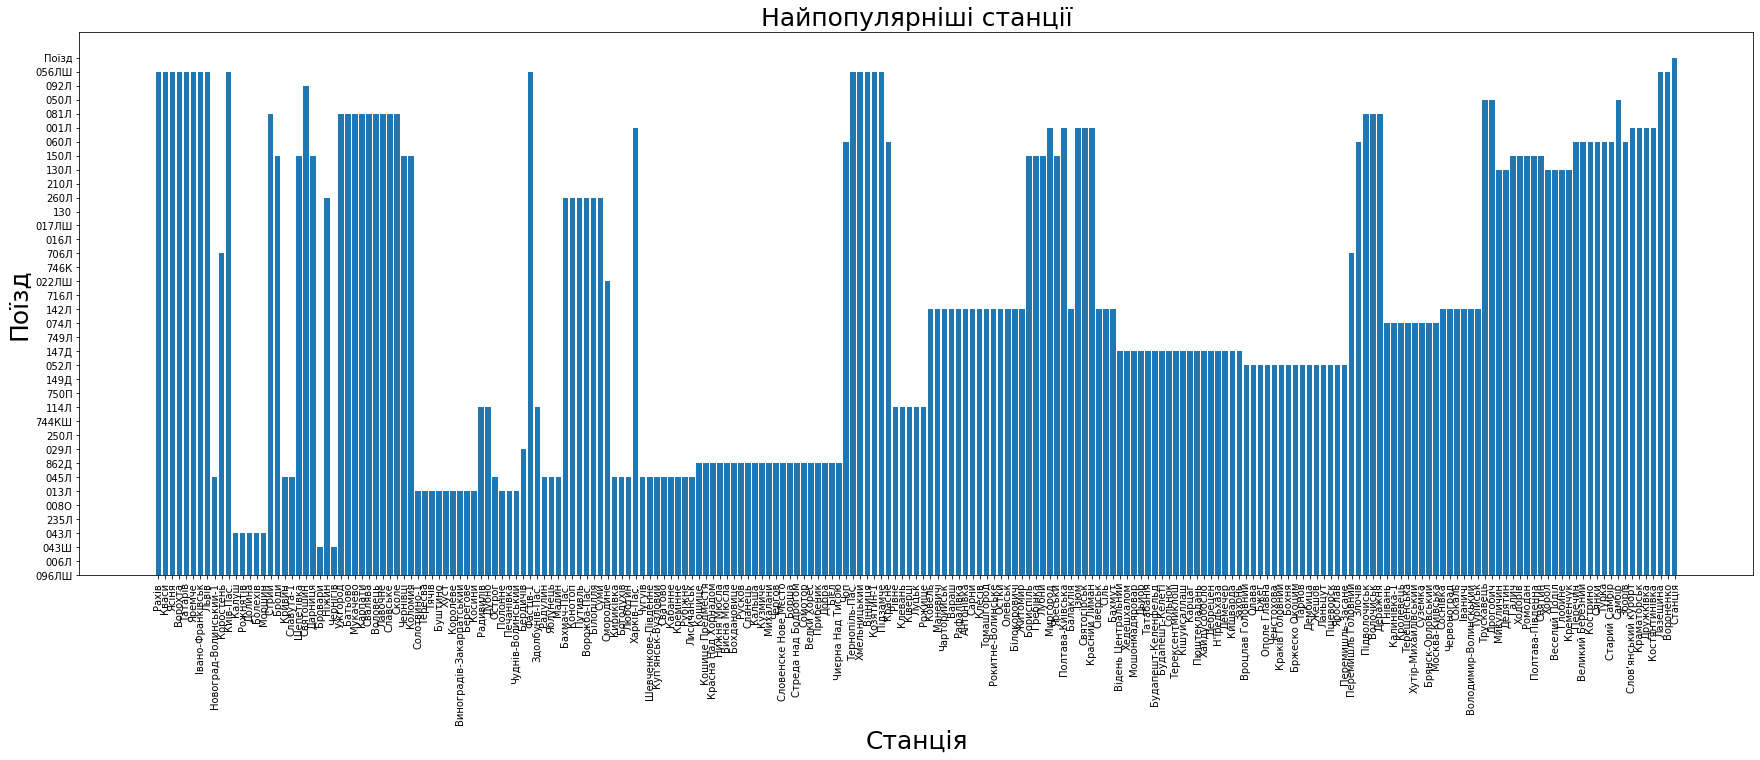

In [7]:
plt.figure(figsize=(30,10))
plt.bar(df['Станція'], df['Поїзд'])
plt.xticks(rotation=90)
plt.title('Найпопулярніші станції', size=25)
plt.xlabel('Станція', size=25)
plt.ylabel('Поїзд', size=25)
plt.show()

### Github Version
https://github.com/OlehLapovets/public/